Denne rapporten blir todelt i to forskjellige oppgaver som hører sammen. Den første delen går på hvordan et system med monomerer oppfører seg i en løsning, mens del to fokuserer på polymerer. Polymerer er monomerer med samme ladning som er koplet sammen med kovalente bindinger. Disse polymererene grupperes sammen, så i utgangspunktet så ser oppgaven på hvordan den kovalente bindingen mellom monomerer påvirker systemet og formasjoner/grupperinger. Oppgaven 1 tar for seg i stor grad hvordan systemet med monomerer påvirkes når de "clustrer/grupperes" under forskjellige temperaturer. Dette betyr at det er en samling av monomerer med forskjellige ladninger (-1 og 1) som bindes sammen. Her observeres det kvalitative forskjeller av gruppedannelser av monomerer ved forskjellige temperaturer. Dette innebærer hvordan temperaturen påvirker gjennomsnittsstørrelsene til disse clustrene som følge av hvor  temperaturen i systemet er. I tillegg, så blir energien i systemet med monomer som ikke har blitt grupperet beregnet i oppgaven. Her sees det også på når energien i systemet når et likevektspunkt ved simulasjoner på 200K og 500K, og hvor mange steg det krever. Oppgave 2 tar for seg ...

Oppgave 1 tar for seg flere funksjoner, f.eks blir det laget en grid gjennom en array med 0'ere, 1'ere og -1'ere. Her representerer 1 og -1 plasseringene til monomerene i rutenettet. Dette betyr at de enten er negative eller positive ladet. Videre, blir dette arrayet plottet, slik det blir et rutenett med størrelse, N*N, og 2*M antall monomerer. Etter dette, så blir det laget en nabofunksjon som returnerer naboposisjonene (vertikalt og horizontalt) i en array til et gitt punkt i arrayene/rutenettet. Også, så defineres en funksjon som regner ut det totale energien i monomer-systemet. Denne plottes så ved forskjellige temperaturer, og så blir det observert når energien når likevekt ved forskjellige temperaturer. 

[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]]
0.0


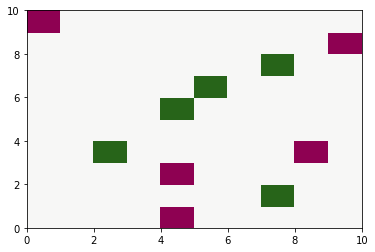

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def monomer_grid(N,M):
    grid = np.zeros((N,N))
    for i in range(M):
        randomPosition = (np.random.randint(N),np.random.randint(N))
        while grid[randomPosition] != 0:
            randomPosition = (np.random.randint(N),np.random.randint(N))
        grid[randomPosition] = 1
    for i in range(M):
        randomPosition = (np.random.randint(N),np.random.randint(N))
        while grid[randomPosition] != 0:
            randomPosition = (np.random.randint(N),np.random.randint(N))
        grid[randomPosition] = -1
    return grid
    

forsok1 = monomer_grid(10,5)
print(forsok1)
print(forsok1[3][4])
plt.pcolormesh(forsok1[::-1],cmap='PiYG')

In [24]:
def neighbour_coord(N, i, j):
    naboarray = [[i, (j-1)%N],
                [i, (j+1)%N],
                [(i-1)%N, j],
                [(i+1)%N, j]]
            
    return naboarray

neighbour_coord(10, 2, 5)

[[2, 4], [2, 6], [1, 5], [3, 5]]

In [15]:
def check_monomer(grid, x, y):
    monomer = False
    if grid[x, y] == 1: ## Sjekker om gridet inneholder en monomer
        monomer = True
    elif grid[x,y] == -1: ## Sjekker om griddet inneholder en monomer
        monomer = True
    return monomer #Returner True hvis det inneholder en monomer

def tot_energy(grid): #grid er gridet som blir generert gjennom monomer_grid
    alfa = ((1.6E-19)**2)/(4*(np.pi)*8*78*(854E-12)*((23E-6)**2))
    energy = 0
    l_g = len(grid[0])
    for i in range(l_g):
        for j in range(l_g):
            monomer = False
            
            if grid[i, j] == 1: #Sjekker om gridet inneholder en monomer
                monomer = True

            elif grid[i,j] == -1: #Setter monomer lik True hvis griddet inneholder en monomer
                monomer = True
            
            if monomer == True:
                nabo_grid = neighbour_coord(l_g, i, j) #Lager et array som inneholder naborutene til originalen
                for square in nabo_grid:
                    posneg = grid[square[0], square[1]]*grid[i, j]
                    if posneg < 0:
                        posneg = -1
                    elif posneg > 0:
                        posneg = 1
                    energy += posneg #summerer opp monomer energy
        
      
    tot_energy = (energy)/(alfa*2)
    return tot_energy

In [50]:
tot_energy(forsok1)

1.3837831280731054e+23